In [1]:
#loading libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from numpy import array
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [32]:
#Spambase
spam_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data")
spam_data.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [33]:
#checking for missing values in the dataset
spam_data.notnull()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [34]:
spam_data.isna()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
#normalizing the features 
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()
sc_spam_data=pd.DataFrame(mmsc.fit_transform(spam_data))
print(sc_spam_data.shape)
type(sc_spam_data)

(4600, 58)


/home/akshay/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


pandas.core.frame.DataFrame

In [36]:
print(sc_spam_data[57])

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
6       1.0
7       1.0
8       1.0
9       1.0
10      1.0
11      1.0
12      1.0
13      1.0
14      1.0
15      1.0
16      1.0
17      1.0
18      1.0
19      1.0
20      1.0
21      1.0
22      1.0
23      1.0
24      1.0
25      1.0
26      1.0
27      1.0
28      1.0
29      1.0
       ... 
4570    0.0
4571    0.0
4572    0.0
4573    0.0
4574    0.0
4575    0.0
4576    0.0
4577    0.0
4578    0.0
4579    0.0
4580    0.0
4581    0.0
4582    0.0
4583    0.0
4584    0.0
4585    0.0
4586    0.0
4587    0.0
4588    0.0
4589    0.0
4590    0.0
4591    0.0
4592    0.0
4593    0.0
4594    0.0
4595    0.0
4596    0.0
4597    0.0
4598    0.0
4599    0.0
Name: 57, Length: 4600, dtype: float64


In [37]:
print(sc_spam_data)

            0         1         2    3      4         5         6         7   \
0     0.046256  0.019608  0.098039  0.0  0.014  0.047619  0.028886  0.006301   
1     0.013216  0.000000  0.139216  0.0  0.123  0.032313  0.026135  0.010801   
2     0.000000  0.000000  0.000000  0.0  0.063  0.000000  0.042641  0.056706   
3     0.000000  0.000000  0.000000  0.0  0.063  0.000000  0.042641  0.056706   
4     0.000000  0.000000  0.000000  0.0  0.185  0.000000  0.000000  0.166517   
5     0.000000  0.000000  0.000000  0.0  0.192  0.000000  0.000000  0.000000   
6     0.000000  0.000000  0.000000  0.0  0.188  0.000000  0.000000  0.169217   
7     0.033040  0.000000  0.090196  0.0  0.061  0.000000  0.041265  0.000000   
8     0.013216  0.008403  0.150980  0.0  0.019  0.054422  0.052270  0.000000   
9     0.000000  0.000000  0.000000  0.0  0.000  0.000000  0.132050  0.000000   
10    0.000000  0.000000  0.049020  0.0  0.038  0.042517  0.034388  0.000000   
11    0.000000  0.048319  0.066667  0.0 

In [38]:
#Prepare the data you loaded as a tensor suitable for a neural network
#creating a tensor from dataframe
spam_tensor = array(sc_spam_data)

In [39]:
print(spam_tensor.shape)
type(spam_tensor)
print(spam_tensor)
#spam_tensor=np.array(spam_tensor)
#print(spam_tensor)


(4600, 58)
[[4.62555066e-02 1.96078431e-02 9.80392157e-02 ... 1.00120144e-02
  6.48358586e-02 1.00000000e+00]
 [1.32158590e-02 0.00000000e+00 1.39215686e-01 ... 4.84581498e-02
  1.42550505e-01 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.90468562e-03
  1.19949495e-02 1.00000000e+00]
 ...
 [6.60792952e-02 0.00000000e+00 5.88235294e-02 ... 5.00600721e-04
  7.38636364e-03 0.00000000e+00]
 [2.11453744e-01 0.00000000e+00 0.00000000e+00 ... 4.00480577e-04
  4.86111111e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.27450980e-01 ... 4.00480577e-04
  2.46212121e-03 0.00000000e+00]]


In [40]:
spam_tensor.ndim

2

In [41]:
#function to split spam data into training and testing subsets
def load_spam_data(array1):
    X=array1[:,:57]
    y=array1[:,57]
    ind = np.arange(0,len(X),1)
    np.random.shuffle(ind)
    X_train=X[ind[0:3600]]
    X_test=X[ind[3600:4600]]
    y_train=y[ind[0:3600]]
    y_test=y[ind[3600:4600]]
    return X_train, X_test, y_train, y_test

#function call to load spam data and split data
X_train2, X_test2, y_train2, y_test2=load_spam_data(spam_tensor)
print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)
print(y_train2)

    

(3600, 57)
(3600,)
(1000, 57)
(1000,)
[0. 1. 1. ... 0. 0. 1.]


In [42]:
#encode class labels using categorical encoding 
#y_train2 = to_categorical(y_train2, 3)
#y_test2 = to_categorical(y_test2, 3)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train2)
y_train2 = encoder.transform(y_train2)
encoder.fit(y_test2)
y_test2 = encoder.transform(y_test2)
print(X_train2.ndim)
type(X_train2)
#X_train2 = np.asarray(X_train2)
#type(X_train2)
#X_train2 = X_train2.reshape((3600,1,57))
#print(X_train2)
#X_train2 = np.reshape(X_train2,(3600,(1,57)))

2


numpy.ndarray

In [43]:
#load keras libraries for using sequential model and layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD

#create a fully connected neural network for the spambase dataset
sp_model = Sequential()
#nn_model.add(Dense(256, activation = 'relu', input_dim=X_train.shape[1]))
#sp_model.add(Flatten(input_shape=X_train2.shape[1:]))
#sp_model.add(Flatten())
sp_model.add(Dense(36, activation = 'relu', input_dim=57))#input_shape=(None,57)))
#sp_model.add(Dense(36, activation = 'relu', input_dim=X_train2.ndim))
#sp_model.add(Dense(18, activation = 'relu'))
#nn_model.add(Dense(5, activation = 'relu'))
#nn_model.add(Dense(5, activation = 'relu'))
#sp_model.add(Flatten())
sp_model.add(Dense(1, activation = 'sigmoid'))

#using SGD for optimization
stoc_grad_desc2 = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

#using crossentropy as loss function for the model
sp_model.compile(loss='binary_crossentropy', optimizer=stoc_grad_desc2, metrics=['accuracy'])
sp_model.summary()             

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 36)                2088      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 37        
Total params: 2,125
Trainable params: 2,125
Non-trainable params: 0
_________________________________________________________________


In [44]:
#training the model
training_hist2 = sp_model.fit(X_train2, y_train2, batch_size=100, epochs = 50,  verbose=2, validation_split=0.2)

Train on 2880 samples, validate on 720 samples
Epoch 1/50
 - 0s - loss: 0.6828 - acc: 0.5715 - val_loss: 0.6686 - val_acc: 0.6042
Epoch 2/50
 - 0s - loss: 0.6608 - acc: 0.6014 - val_loss: 0.6545 - val_acc: 0.6042
Epoch 3/50
 - 0s - loss: 0.6514 - acc: 0.6010 - val_loss: 0.6454 - val_acc: 0.6042
Epoch 4/50
 - 0s - loss: 0.6427 - acc: 0.6010 - val_loss: 0.6364 - val_acc: 0.6097
Epoch 5/50
 - 0s - loss: 0.6340 - acc: 0.6073 - val_loss: 0.6266 - val_acc: 0.6111
Epoch 6/50
 - 0s - loss: 0.6243 - acc: 0.6128 - val_loss: 0.6158 - val_acc: 0.6167
Epoch 7/50
 - 0s - loss: 0.6136 - acc: 0.6212 - val_loss: 0.6037 - val_acc: 0.6333
Epoch 8/50
 - 0s - loss: 0.6019 - acc: 0.6698 - val_loss: 0.5904 - val_acc: 0.6625
Epoch 9/50
 - 0s - loss: 0.5889 - acc: 0.6753 - val_loss: 0.5762 - val_acc: 0.6847
Epoch 10/50
 - 0s - loss: 0.5751 - acc: 0.7059 - val_loss: 0.5609 - val_acc: 0.7431
Epoch 11/50
 - 0s - loss: 0.5606 - acc: 0.7392 - val_loss: 0.5457 - val_acc: 0.7931
Epoch 12/50
 - 0s - loss: 0.5460 - acc

Text(0, 0.5, 'loss')

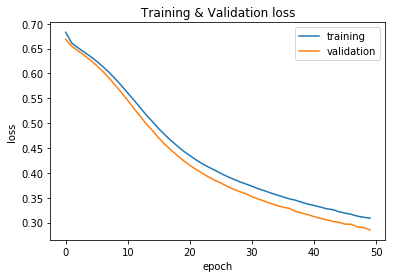

In [45]:
import matplotlib.pyplot as plt
#Plot training and validation loss
plt.plot(training_hist2.history['loss'])
plt.plot(training_hist2.history['val_loss'])
plt.title('Training & Validation loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

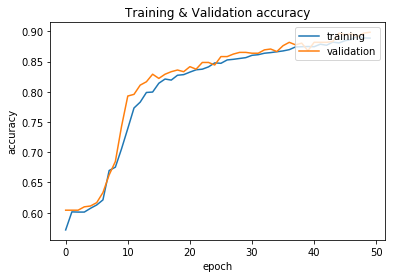

In [46]:
import matplotlib.pyplot as plt
#Plot training and validation loss
plt.plot(training_hist2.history['acc'])
plt.plot(training_hist2.history['val_acc'])
plt.title('Training & Validation accuracy')
plt.legend(['training', 'validation'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [47]:
loss_accuracy_score2 = sp_model.evaluate(X_test2, y_test2)#, batch_size=100, verbose=2)
print("Loss ", loss_accuracy_score2[0] )
print("Accuracy score:",loss_accuracy_score2[1])

1000/1000 [==============================] - 0s 18us/step
Loss  0.30628150832653045
Accuracy score: 0.891


In [48]:
#training the model with test data
training_hist2 = sp_model.fit(X_test2, y_test2, batch_size=100, epochs = 50,  verbose=2, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/50
 - 0s - loss: 0.3130 - acc: 0.8800 - val_loss: 0.2812 - val_acc: 0.9200
Epoch 2/50
 - 0s - loss: 0.3113 - acc: 0.8812 - val_loss: 0.2831 - val_acc: 0.9200
Epoch 3/50
 - 0s - loss: 0.3107 - acc: 0.8850 - val_loss: 0.2815 - val_acc: 0.9250
Epoch 4/50
 - 0s - loss: 0.3098 - acc: 0.8825 - val_loss: 0.2820 - val_acc: 0.9250
Epoch 5/50
 - 0s - loss: 0.3093 - acc: 0.8862 - val_loss: 0.2835 - val_acc: 0.9200
Epoch 6/50
 - 0s - loss: 0.3080 - acc: 0.8850 - val_loss: 0.2799 - val_acc: 0.9200
Epoch 7/50
 - 0s - loss: 0.3072 - acc: 0.8838 - val_loss: 0.2799 - val_acc: 0.9200
Epoch 8/50
 - 0s - loss: 0.3069 - acc: 0.8850 - val_loss: 0.2820 - val_acc: 0.9200
Epoch 9/50
 - 0s - loss: 0.3058 - acc: 0.8862 - val_loss: 0.2796 - val_acc: 0.9200
Epoch 10/50
 - 0s - loss: 0.3051 - acc: 0.8850 - val_loss: 0.2783 - val_acc: 0.9200
Epoch 11/50
 - 0s - loss: 0.3045 - acc: 0.8875 - val_loss: 0.2807 - val_acc: 0.9250
Epoch 12/50
 - 0s - loss: 0.3036 - acc:

In [49]:
loss_accuracy_score2 = sp_model.evaluate(X_test2, y_test2)#, batch_size=100, verbose=2)
print("Loss ", loss_accuracy_score2[0] )
print("Accuracy score:",loss_accuracy_score2[1])

1000/1000 [==============================] - 0s 29us/step
Loss  0.2783319700956345
Accuracy score: 0.899


In [76]:
#save the model 
sp_model.save("My_fully_connected_nn2")
sp_model.save_weights("Model_weights2.h5")
load_sp_model = sp_model.load_weights("Model_weights2.h5")
#new_model=load_model("My_fully_connected_nn")